In [27]:
#module importation
from pandas import *
from math import *
from numpy import *
from datetime import datetime

%matplotlib notebook
import matplotlib.pyplot as plt

In [25]:
#load of the csv file as a dataframe
dstest = read_csv("dstest.csv" , sep="," , header = 0)
#dataframe shape
print(dstest.shape)
print("===========")
#dataframe summary
print(dstest.describe)

(385165, 13)
<bound method NDFrame.describe of               company live mediaEngine         p2p         cdn     upload  \
0       Streamroot TV  VOD         ME1         0.0   8507376.0        0.0   
1       Streamroot TV  VOD         ME1         0.0   5778744.0        0.0   
2       Streamroot TV  VOD         ME1         0.0   7692960.0        0.0   
3       Streamroot TV  VOD         ME1         0.0   8229888.0        0.0   
4       Streamroot TV  VOD         ME1         0.0  10387000.0        0.0   
...               ...  ...         ...         ...         ...        ...   
385160  Streamroot TV  VOD         ME1  14849556.0         0.0    76800.0   
385161  Streamroot TV  VOD         ME1  12287680.0         0.0   417400.0   
385162  Streamroot TV  VOD         ME1  13229184.0         0.0     6588.0   
385163  Streamroot TV  VOD         ME1   3515600.0         0.0  2000896.0   
385164  Streamroot TV  VOD         ME1         0.0         0.0  6739956.0   

        peers_count  peers_m

question 1 | Knowing the goal of the our technology, define a metric to measure
our performance. Calculate that performance score for each of the companies in
the dataset.

question 2 part 1 | How can we know whether a payload is the first payload of a viewer’s
session?

We can know whether a payload is the first of a viewer's session by looking at the first time he is connected viewing a content

question 2 part 2 | Add a column isFirstPayload to the dataset, that must be True if the
row represents a payload that was the first payload sent by a viewer, and
False otherwise.

In [18]:
#distinction of the viewers
distinct_viewers = list(set(dstest["content"].tolist()))
#distinction of the companies
distinct_companies = list(set(dstest["company"].tolist()))

#creating a list full of "False"
isFirstPayload = [False for row in range(dstest.shape[0])]

#disction of viewers per company
list_df_viewers_company = []

for viewer in distinct_viewers:

#filtering of subdataset on each viewer and timestamp
    df_viewer = dstest[dstest["content"] == viewer]
    
    for company in distinct_companies : 
        #subquery of all the users in a single comapny
        df_viewer_company = df_viewer[df_viewer["company"] == company][["timestamp" , "content"]]
        
        #list_df_viewers_company.append([viewer , company ,  int(df_viewer[["timestamp"]].idxmin())])
        
        #putting to True the first payload of each viewer in a particular company
        isFirstPayload[int(df_viewer[["timestamp"]].idxmin())] = True
        
#adding the column isFirstPayload to the dataframe dstest       
dstest["isFirstPayload"] = isFirstPayload


In [19]:
#sum of the number of distinct viewers that send payloads for each company

for company in distinct_companies:
    df_company_isfirstpayload = dstest[dstest["company"] == company]["isFirstPayload"].tolist()
    sum_df_company_isfirstpayload = sum(df_company_isfirstpayload)
    
print(sum_df_company_isfirstpayload)


16898


question 3 part 1 | Let’s consider a viewer A who starts a video at T=0, then has a playback
error at T = 2 minutes 30 seconds, and then another one at T=6 minutes
20 seconds. What will be the values of the fields playbackErrorCount and
totalPlaybackErrorCount in the first 5 payloads sent by viewer A?

We know that a payload is sent every 2 minutes , if a user experience playbackerror at 2 minutes and 30 seconds and 6 minutes and 20 secondes then within the first 5 payloads that covers a timelapse of 10 minutes the fields playbackerror will look like this [0,1,0,1,0] and totalplaybackerror will look like this [0,0,0,0,2]

question 3 part 2 | Calculate the number of distinct viewers that had at least 1 playback
error during their session.

In [13]:
#getting all the distincts viewers of content
distinct_viewers = list(set(dstest["content"].tolist()))

#getting the playback errors per viewers content

total_playbackerrors_viewers = []
for viewer in distinct_viewers :
    playbackerrors_viewer = [viewer , sum(dstest[dstest["content"] == viewer]["playbackErrorCount"].tolist())]

#getting the viewers with at least one playback error
    if (playbackerrors_viewer[1] >= 1):
        total_playbackerrors_viewers.append(playbackerrors_viewer)
    
#content viewed and number of playback errors occured
print(total_playbackerrors_viewers))

#number of viewers with at least one playback error
print(len(total_playbackerrors_viewers))
    

5


question 4 part 1 | Add a column “readableDate” to the dataset that will be the beginning
of the 2 minutes window during which the payload was sent.For example, if a
payload was sent at 11:35, the column “readableDate” should be 11:33.

In [21]:
#listing of the timestamps in milliseconds
timestamps = dstest["timestamp"].tolist()

#conversion of timestamps into date and time
readableDate = list(map(lambda timestamp : datetime.fromtimestamp(((timestamp/1000) - 120)), timestamps))

dstest["readableDate"] = readableDate
dstest.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,readableDate
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,True,2019-07-07 05:21:27.407
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,False,2019-07-07 05:23:27.310
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,False,2019-07-07 05:25:27.330
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,False,2019-07-07 05:27:27.720
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,False,2019-07-07 05:29:27.353


question 4 part 2 | Plot the concurrency time series for the content content-05335.

<IPython.core.display.Javascript object>


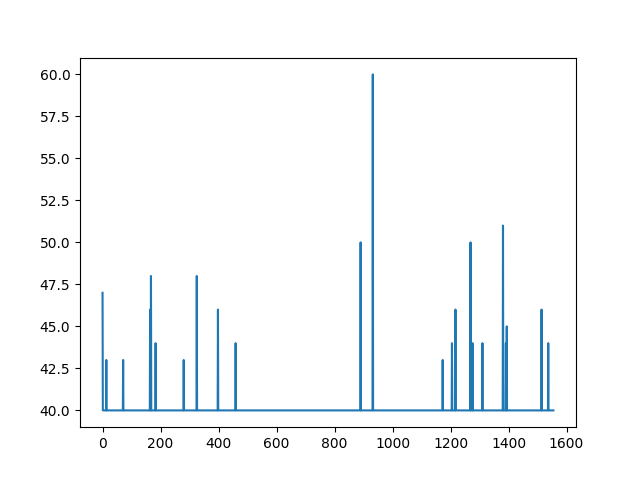

1556

In [28]:
#extraction of the "content-05335" concurrency signal from dstest
 ts_content_05335 = dstest[dstest["content"] == "content-05335"]["peers_match"].tolist()
    
#plotting of the "content-05335" concurrency signal
plt.plot(ts_content_05335)
